In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import MaxPooling2D, ZeroPadding2D
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
from keras import backend as K
from keras.utils import np_utils
%matplotlib inline

Using Theano backend.


In [2]:
# Data loading + reshape to 4D
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 1, 28, 28)

In [3]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]))

In [10]:
# Model 
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(1,28,28))) 
convout1 = Activation('relu')
model.add(convout1)
convout2 = MaxPooling2D()
model.add(convout2)

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 32, 26, 26)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 13, 13)    0           activation_4[0][0]               
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 5408)          0           maxpooling2d_2[0][0]             
___________________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 90s - loss: 0.2456 - acc: 0.9295 - val_loss: 0.0803 - val_acc: 0.9763


In [27]:
# choose any image to want by specifying the index
img_to_visualize = X_train[59999]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [28]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

Shape of conv: (32, 26, 26)
Shape of conv: (32, 13, 13)


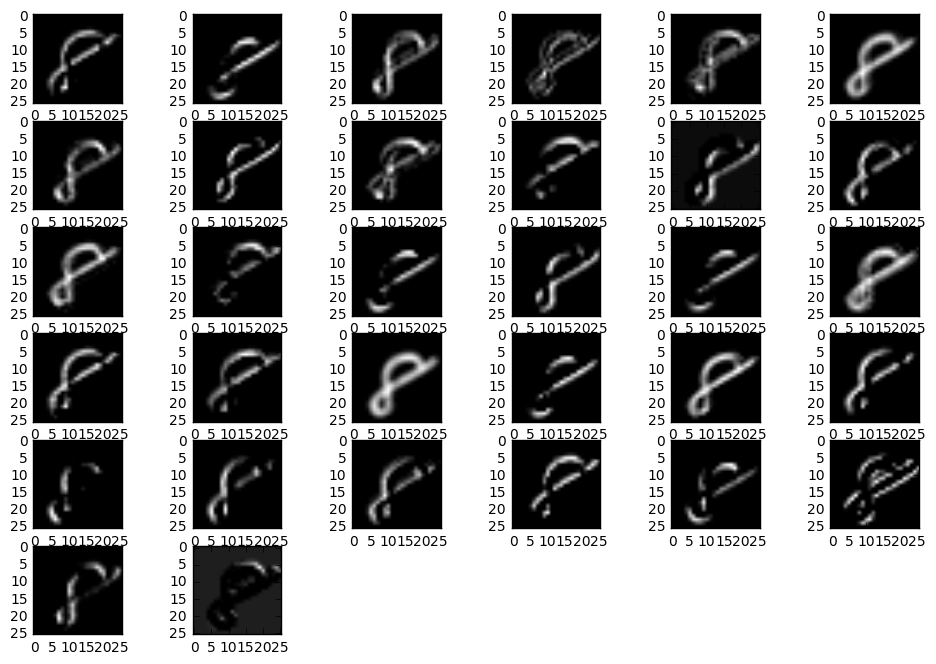

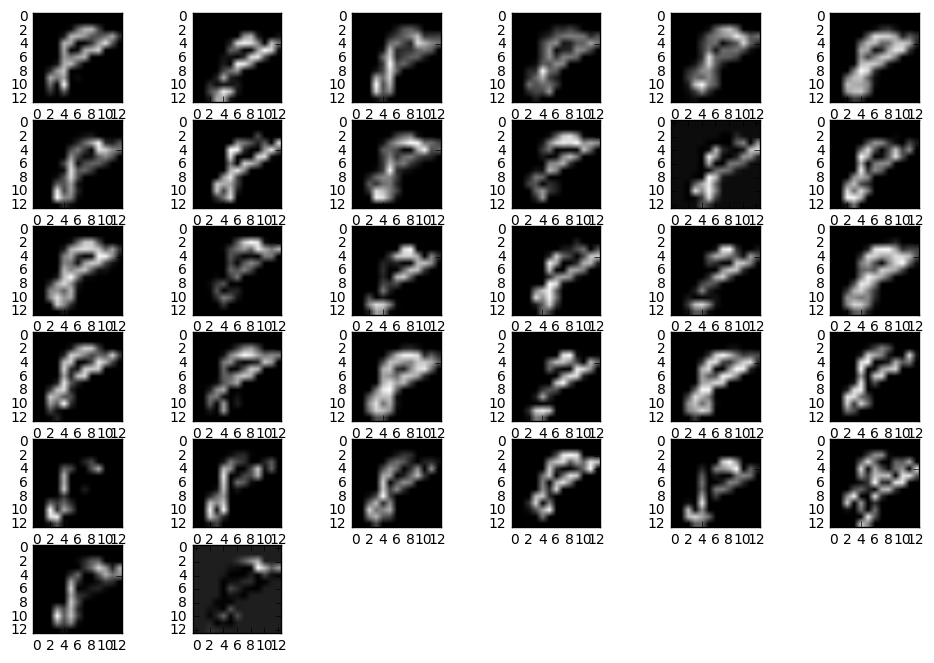

In [29]:
# Specify the layer to want to visualize
layer_to_visualize(convout1)

# As convout2 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced 
layer_to_visualize(convout2)